# MyQLM Bell State

In [ ]:
try:
    import qat.lang.AQASM
except ImportError:
    print("installing myqlm...")
    !pip install --quiet myqlm
    print("installed myqlm.")
    from qat.lang.AQASM import Program, H, CNOT

In [ ]:
# Create a Program
qprog = Program()
# Number of qbits
nbqbits = 2
# Allocate some qbits
qbits = qprog.qalloc(nbqbits)

# Apply some quantum Gates
qprog.apply(H, qbits[0]) 
qprog.apply(CNOT, qbits[0], qbits[1])

# Export this program into a quantum circuit
circuit = qprog.to_circ()
# And display it!
#for instruction in circuit.iterate_simple():
    #print(instruction)

In [ ]:
# import one Quantum Processor Unit Factory
from qat.qpus import PyLinalg

# Create a Quantum Processor Unit
pylinalgqpu = PyLinalg()

# Create a job
job = circuit.to_job()

# Submit the job to the QPU
result = pylinalgqpu.submit(job)

# Iterate over the final state vector to get all final components
for sample in result:
    print("State %s amplitude %s Probability %s" % (sample.state, sample.amplitude, sample.probability))

State |00> amplitude (0.7071067811865475+0j) Probability 0.4999999999999999
State |11> amplitude (0.7071067811865475+0j) Probability 0.4999999999999999


In [27]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=1024)

# Submit to the QPU
result = pylinalgqpu.submit(job)

# And use it to draw 10 samples
for sample in result:
    print("We measured the state {} (its probability is {})".format(sample.state, sample.probability))

We measured the state |00> (its probability is 0.5009765625)
We measured the state |11> (its probability is 0.4990234375)


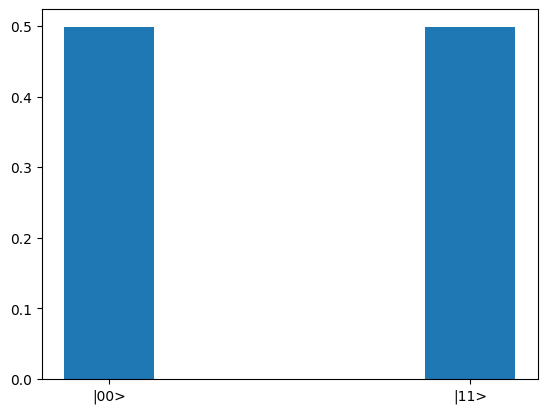

In [29]:
import matplotlib.pyplot as plt

x = ["|00>", "|11>"]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.bar([0,1],sample.probability, width=0.25)
plt.show()

## Exercise

Code the circuits for the Bell states, draw the circuits and run the circuits in a quantum software simulator.

In [ ]:
#[your code here]